<a href="https://colab.research.google.com/github/ArielFix/DLINtroProject/blob/NNModel/LSTM_Model_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Natural Language Processing with Disaster Tweets task can be considered a complex task for several reasons:

Unstructured data: The data for this task consists of unstructured text data in the form of tweets, which can be messy, inconsistent, and contain misspelled words, slang, and emoticons. This makes preprocessing and cleaning the data a challenging task.

Handling imbalanced classes: In the disaster tweets task, the number of positive (disaster-related) tweets is much lower than the number of negative (not disaster-related) tweets. This creates an imbalanced dataset, which can make it difficult for the model to accurately classify disaster-related tweets.

Ambiguous and misleading information: Tweets can contain misleading or ambiguous information, which makes it challenging for the model to accurately classify them as disaster-related or not. For example, a tweet may contain disaster-related keywords but not actually be related to a disaster.

Dealing with multiple languages: The data for this task can contain tweets written in different languages, making it challenging for the model to accurately classify them.

Sentiment analysis: The task requires the model to classify tweets based on their sentiment, which can be difficult due to the complex nature of human emotion and the subjectivity of sentiment analysis.

LSTMs are well-suited for the Natural Language Processing with Disaster Tweets task for several reasons:

Contextual understanding: LSTMs are able to maintain context and understand the relationships between words in a sentence, making them well-suited for NLP tasks that require the model to understand the meaning of text. This is particularly important in the context of disaster tweets, where the model needs to be able to understand the context of the tweet in order to determine whether it is related to a disaster or not.

Handling sequences: LSTMs are designed to handle sequences of data, making them well-suited for text classification tasks where the model needs to consider the order of words in a sentence. In the disaster tweets task, the model needs to understand the order of words in a tweet in order to determine its meaning and classify it as disaster-related or not.

Dealing with unknown words: LSTMs are able to learn and handle words that they have not seen before, making them well-suited for tasks like disaster tweet classification where the model may encounter words that it has not seen before.

Fine-tuning: LSTMs can be fine-tuned for specific NLP tasks, making them a versatile tool for text classification. This is particularly useful in the context of disaster tweets, where the model needs to be able to classify tweets based on their content.

Overall, the ability of LSTMs to maintain context, handle sequences of data, deal with unknown words, and be fine-tuned for specific NLP tasks make them a good choice for the Natural Language Processing with Disaster Tweets task.

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string 


from sklearn.model_selection import train_test_split #Library for Splitting Dataset
from sklearn import metrics

#Libraries for NN
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')
train_data_path = '/content/gdrive/MyDrive/IDL_Assignments/NLP_Project/data/augmented_train.csv'
test_data_path = '/content/gdrive/My Drive/IDL_Assignments/NLP_Project/data/test.csv'
submission_path = '/content/gdrive/MyDrive/IDL_Assignments/NLP_Project/data/sample_submission.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
train_data = pd.read_csv(train_data_path)

In [9]:
def toclean_text(text):

    
    clean_text = [char for char in text if char not in string.punctuation]
   
    clean_text = ''.join(clean_text)
    
        
    return clean_text

In [10]:
train_data['clean_text'] = train_data['text'].apply(toclean_text) #This line gives the text without punctuation

More pre-processing must be done! such as replace abbreviations with the original word, remove URLs, remove numbers, remove emojis..etc...

In [11]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [12]:
# Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',text)

# Remove HTML beacon
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# Change an abbreviation by its true meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "        
    return string

# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)

# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)

# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'EMOJI', text)

# Replace some others smileys with SADFACE
def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)

# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)

# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)

In [13]:
def clean_tweet(text):
    
    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)
    
    # replace abbreviations, @ and number
    text = replace_abbrev(text)  
    text = remove_mention(text)
    text = remove_number(text)
    
    # Remove emojis / smileys
    text = remove_emoji(text)
    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)
  
    return text

In [14]:
l =50
max_features=5000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(train_data['clean_text'].values)
X = tokenizer.texts_to_sequences(train_data['clean_text'].values)
X = pad_sequences(X, maxlen =l)

Model-

In [15]:
y = train_data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =41) #Split arrays or matrices into random train and test subsets.


Model explanation -
This is a code that creates a deep learning model for binary classification using the Keras library in Python. The model is a sequential model, which means that the layers are added one after the other in a linear stack. The model is designed to classify tweets as either disaster-related or not.

Embedding layer: The first layer of the model is an Embedding layer. This layer maps each word in the input sequence to a dense vector of fixed size, called the embedding vector. The embed_dim argument specifies the size of the embedding vector, in this case, it is 32. The input_length argument specifies the length of the input sequence, in this case, it is X.shape[1]. The max_features argument specifies the number of unique words in the vocabulary, which is used to initialize the weights of the embedding layer.

Dropout layer: The second layer of the model is a Dropout layer. This layer randomly sets input units to 0 with a frequency of 0.2 at each step during training time, which helps prevent overfitting.

LSTM layer: The third layer of the model is an LSTM layer. This layer is a type of Recurrent Neural Network (RNN) that is well-suited for processing sequences of data. The lstm_out argument specifies the size of the output of the LSTM layer, in this case, it is 32. The dropout and recurrent_dropout arguments specify the dropout rates for the LSTM layer.

Dense layer: The fourth and final layer of the model is a Dense layer with one output node and a sigmoid activation function. This layer is used to make the binary classification by producing a probability value between 0 and 1, where values close to 0 correspond to class 0 (not disaster-related) and values close to 1 correspond to class 1 (disaster-related).

Compiling the model: The model is compiled using the binary_crossentropy loss function, which is suitable for binary classification problems, and the Adam optimizer with a learning rate of 0.002. The metrics argument specifies that accuracy will be used as the evaluation metric.

Finally, the model.summary() function call outputs a summary of the model architecture and its parameters, which can be useful for understanding the structure of the model.

In [16]:
embed_dim = 32 
lstm_out = 32 #output_dim: Dimension of embedding vector
model = Sequential() #a plain stack of layers where each layer has exactly one input tensor and one output tensor.
model.add(Embedding(max_features, embed_dim, input_length = X.shape[1])) #using embedding better then one-hot in the cases where mose indices are zero
model.add(Dropout(0.2)) #Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 dropout (Dropout)           (None, 50, 32)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1333/1333 [==============================] - 81s 58ms/step - loss: 0.3499 - accuracy: 0.8491 - val_loss: 0.2735 - val_accuracy: 0.8894
Epoch 2/10
1333/1333 [==============================] - 80s 60ms/step - loss: 0.2137 - accuracy: 0.9144 - val_loss: 0.2050 - val_accuracy: 0.9163
Epoch 3/10
1333/1333 [==============================] - 78s 58ms/step - loss: 0.1634 - accuracy: 0.9337 - val_loss: 0.1855 - val_accuracy: 0.9240
Epoch 4/10
1333/1333 [==============================] - 78s 59ms/step - loss: 0.1357 - accuracy: 0.9441 - val_loss: 0.1862 - val_accuracy: 0.9288
Epoch 5/10
1333/1333 [==============================] - 78s 59ms/step - loss: 0.1225 - accuracy: 0.9509 - val_loss: 0.1783 - val_accuracy: 0.9310
Epoch 6/10
1333/1333 [==============================] - 78s 58ms/step - loss: 0.1083 - accuracy: 0.9550 - val_loss: 0.1845 - val_accuracy: 0.9296
Epoch 7/10
1333/1333 [==============================] - 84s 63ms/step - loss: 0.0981 - accuracy: 0.9587 - val_loss: 0.1728 -

In [18]:
y_pred = model.predict(X_test).round()

334/334 [==============================] - 3s 8ms/step


In [19]:
y_pred

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

Evaluation

In [20]:
train_accuracy = round(metrics.accuracy_score(y_train,model.predict(X_train).round())*100)
train_accuracy

1333/1333 [==============================] - 11s 8ms/step


98

In [21]:
print('Accuracy  is  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall  is    : ', (metrics.recall_score(y_test, y_pred)))
print('Precision  is : ', (metrics.precision_score(y_test, y_pred)))

Accuracy  is  :  0.9415517403133502
Recall  is    :  0.9158674803836094
Precision  is :  0.9466095967560262


Submission

In [22]:
test_data = pd.read_csv(test_data_path)

In [24]:
import re

In [25]:
test_data['clean_text'] = test_data['text'].apply(toclean_text)
test_data["clean_text"] = test_data["clean_text"].apply(clean_tweet)

In [26]:
tokenizer.fit_on_texts(train_data['clean_text'].values)
test_token = tokenizer.texts_to_sequences(test_data['clean_text'].values)
test_token = pad_sequences(test_token, maxlen =l)

In [27]:
embed_dim = 100
lstm_out = 100
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.4))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=2e-3)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           500000    
                                                                 
 dropout_1 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [28]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [29]:
model.fit(X,y, epochs = 10,validation_split = 0.2 ,callbacks=[es_callback], batch_size=32)

Epoch 1/10
1333/1333 [==============================] - 288s 211ms/step - loss: 0.3208 - accuracy: 0.8666 - val_loss: 0.6867 - val_accuracy: 0.7387
Epoch 2/10
1333/1333 [==============================] - 287s 215ms/step - loss: 0.1598 - accuracy: 0.9362 - val_loss: 0.8694 - val_accuracy: 0.7318
Epoch 3/10
1333/1333 [==============================] - 285s 214ms/step - loss: 0.1116 - accuracy: 0.9548 - val_loss: 1.3326 - val_accuracy: 0.7151
Epoch 4/10
1333/1333 [==============================] - 287s 215ms/step - loss: 0.0884 - accuracy: 0.9637 - val_loss: 1.4224 - val_accuracy: 0.7156


In [30]:
y_hat = model.predict(test_token).round()
submission = pd.read_csv(submission_path)
submission['target'] = np.round(y_hat).astype('int')
submission.to_csv('submission.csv', index=False)
submission.describe().style.background_gradient(cmap='coolwarm')

102/102 [==============================] - 3s 29ms/step


,id,target
count,3263.000000,3263.000000
mean,5427.152927,0.425682
std,3146.427221,0.494522
min,0.000000,0.000000
25%,2683.000000,0.000000
50%,5500.000000,0.000000
75%,8176.000000,1.000000
max,10875.000000,1.000000


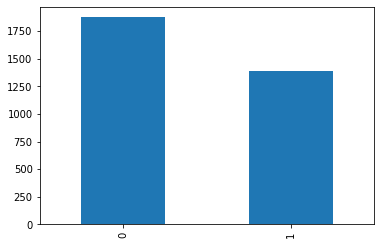

In [31]:
submission.target.value_counts().plot.bar();